# Storytelling Data Visualization on Exchange Rates

This project will help me create some data storytelling using matplotlib.

In [3]:
import pandas as pd

exchange_rates = pd.read_csv('/Users/bacci/Datasets/euro-daily-hist_1999_2020.csv')

In [4]:
print(exchange_rates.head())
print(exchange_rates.tail())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

As we can see the dataset has 41 columns, each one referred to a different currency, and 5699 rows, each referred to the € exchange rate for that currency in a day. Some of the currencies have null values: for example Greece introduce the € in 2002, and the dataset is starting from 1999, so it's natural that some values are missing. Slovenia is another example, albeit they introduce the € in 2007 (ditto for Slovakia and Cyprus).

Since we are talkin about exchange rates we should expect numbers as the data type, instead we have objects (the time column should be a datetime).

In [11]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [17]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy() #copy the US dollar exchange rate into a new dataframe
euro_to_dollar['US_dollar'].value_counts() 

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.1292     1
1.2804     1
1.2070     1
1.2801     1
0.9376     1
Name: US_dollar, Length: 3528, dtype: int64

We can see that there are 62 occurrenceof the '-' character, let's remove them.

In [18]:
euro_to_dollar = euro_to_dollar[euro_to_dollar.US_dollar != '-'] #remove - character un the US_dollar column
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float) #convert column from object to float

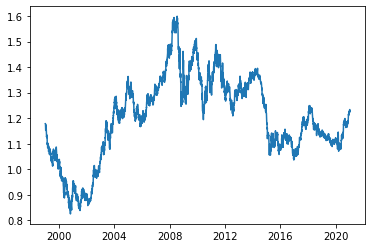

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

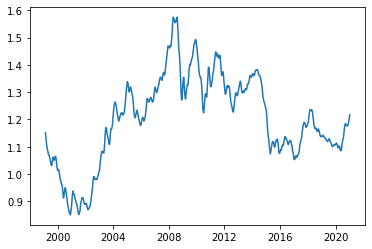

In [21]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()